In [1]:
import sys
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import csv
from collections import OrderedDict, Counter

# Data Analysis

## Affective Ratings

In [2]:
def filter_adjectives(tagged_file):
    '''reads a tagged file of song lyrics, filters out the adjectives and returns a list of them'''
    with open(tagged_file, 'r') as f:
        songs_tagged = f.read().replace('\t', ' ')
    songs_tagged_final = songs_tagged.split('\n')
    songs_adjectives = []
    for element in songs_tagged_final:
        if 'JJ' in element:
            songs_adjectives.append(element.split(' ')[0])
    return songs_adjectives

In [3]:
country_adjectives = list(OrderedDict.fromkeys(filter_adjectives('country_tagged.txt')))

In [4]:
country_adjectives

['distant',
 'walkin',
 'closed',
 'sure',
 'wrong',
 'lonely',
 'greatest',
 'back',
 'cruel',
 'favorite',
 'good',
 'finest',
 'long',
 'best',
 'single',
 'northern',
 'late',
 'next',
 'conscious',
 'clear',
 'green',
 'windy',
 'magic',
 'peaceful',
 'many',
 'different',
 'cold',
 'warm',
 'gentle',
 'happy',
 'last',
 'shattered',
 'greater',
 'precious',
 'whole',
 'friendly',
 'little',
 'Pacing',
 'old',
 'dirty',
 'much',
 'sick',
 'beautiful',
 'Most',
 'Mamas',
 'great',
 'dear',
 'brown',
 'sweet',
 'close',
 'wild',
 'Turned',
 'madeup',
 'sudden',
 'telling',
 'sorry',
 'free',
 'strong',
 'right',
 'light',
 'perfect',
 'sleepy',
 'enough',
 'crowded',
 'uptight',
 'live',
 'golden',
 'randy',
 'sapnish',
 'theyre',
 'top',
 'slow',
 'Wed',
 'electric',
 'hangin',
 'sloppy',
 'like',
 'Back',
 'Small',
 'bigeyed',
 'hard',
 'front',
 'southern',
 'everlasting',
 'Dixie',
 'real',
 'ole',
 'laidback',
 'young',
 'physical',
 'Started',
 'new',
 'hot',
 'guiding',
 'Nee

In [5]:
ratings = pd.read_csv('Ratings_Warriner_et_al.csv')
ratings_final = ratings.set_index('Word')['V.Mean.Sum']

In [6]:
def affective_rating(token_list):
    '''looks up the part of speech from the list in the affective ratings, attributes them to each other and returns the percentages of positives and negatives'''
    affective_rating = {}
    for word in token_list:
        if word.lower() in ratings_final:
            affective_rating[word.lower()] = ratings_final[word.lower()]
        else:
            continue
    positives = []
    negatives = []
    for value in affective_rating.values():
        if value >= 5:
            positives.append(value)
        else:
            negatives.append(value)
    positives_percentage = len(positives)/len(affective_rating)
    negatives_percentage = len(negatives)/len(affective_rating)
    return 'positive: ', positives_percentage, 'negative: ', negatives_percentage

In [7]:
country_rating = affective_rating(country_adjectives)

In [8]:
country_rating

('positive: ', 0.5969479353680431, 'negative: ', 0.4030520646319569)

In [9]:
def filter_tokens(tagged_file, part_of_speech):
    '''reads a tagged file of song lyrics, filters out the part of speech given and returns a list of them'''
    with open(tagged_file, 'r') as f:
        songs_tagged = f.read().replace('\t', ' ')
    songs_tagged_final = songs_tagged.split('\n')
    filter_result = []
    if part_of_speech == 'adjective':
        adj = True
        noun = False
        verb = False
    elif part_of_speech == 'noun':
        noun = True
        adj = False
        verb = False
        noun_pos = ['NN', 'NP', 'NNS']
    elif part_of_speech == 'verb':
        noun = False
        adj = False
        verb = True
        verb_pos = ['VVG', 'VVP', 'VVD', 'VV', 'VVZ', 'VVN']
    for element in songs_tagged_final:
        if adj and 'JJ' in element:
            filter_result.append(element.split(' ')[0])
        elif noun and any(x in element for x in noun_pos):
            filter_result.append(element.split(' ')[2])
        elif verb and any(x in element for x in verb_pos):
            filter_result.append(element.split(' ')[2])
    return filter_result

In [10]:
filter_tokens('country_tagged.txt', 'adjective')

['distant',
 'walkin',
 'closed',
 'sure',
 'wrong',
 'lonely',
 'greatest',
 'lonely',
 'back',
 'cruel',
 'favorite',
 'good',
 'good',
 'good',
 'good',
 'finest',
 'lonely',
 'long',
 'best',
 'single',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'good',
 'northern',
 'late',
 'lonely',
 'lonely',
 'next',
 'conscious',
 'clear',
 'green',
 'lonely',
 'windy',
 'magic',
 'peaceful',
 'many',
 'different',
 'cold',
 'warm',
 'gentle',
 'happy',
 'happy',
 'last',
 'cold',
 'shattered',
 'greater',
 'precious',
 'whole',
 'warm',
 'friendly',
 'warm',
 'friendly',
 'last',
 'little',
 'Pacing',
 'little',
 'old',
 'dirty',
 'much',
 'sick',
 'beautiful',
 'good',
 'Most',
 'Mamas',
 'great',
 'much',
 'sick',
 'beautiful',
 'little',
 'much',
 'sick',
 'beautiful',
 'beautiful',
 'dear',
 'little',
 'brown',
 'sweet',
 'clear',
 'clear',
 'dear',
 'little',
 'brown',
 'close',
 'dear',
 'little',
 'brown',
 'close',
 'wild',
 'd

In [11]:
filter_tokens('country_tagged.txt', 'verb')

['call',
 'call',
 'call',
 'call',
 'see',
 'start',
 'find',
 'stumble',
 'say',
 'see',
 'call',
 'call',
 'bring',
 'know',
 'tell',
 'know',
 'tell',
 'love',
 'tell',
 'do',
 'know',
 'hurt',
 'do',
 'call',
 'call',
 'bring',
 'know',
 'know',
 'tell',
 'please',
 'make',
 'understand',
 'carry',
 'know',
 'tell',
 'please',
 'call',
 'call',
 'call',
 'call',
 'call',
 'call',
 'call',
 'call',
 'call',
 'call',
 'call',
 'call',
 'call',
 'think',
 'think',
 'last',
 'try',
 'make',
 '<unknown>',
 'say',
 'slam',
 'bed',
 'try',
 'forget',
 'say',
 'play',
 'wont',
 'take',
 'pick',
 'keep',
 'cant',
 'keep',
 'keep',
 'keep',
 'take',
 'wont',
 'put',
 'see',
 'think',
 'break',
 'add',
 'let',
 'tell',
 'get',
 'keep',
 'cant',
 'keep',
 'keep',
 'keep',
 'friend',
 'gonna',
 'take',
 'erase',
 'know',
 'keep',
 'cant',
 'keep',
 'keep',
 'keep',
 'wont',
 'take',
 'pick',
 'keep',
 'keep',
 'keep',
 'keep',
 'wait',
 'knock',
 'wont',
 'give',
 'like',
 'need',
 'feel',
 'w

In [12]:
def adjective_ratings():
    '''looks up the affective ratings of the adjectives of each genre and returns a dictionary with positive and negative average ratings per genre'''
    adjective_ratings = {}
    for file in list_of_files:
        genre = file.partition('.')[0].replace('_tagged', '').replace('_', ' ')
        adjective_ratings[genre] = affective_rating(list(OrderedDict.fromkeys(filter_tokens(file, 'adjective'))))
    return adjective_ratings

In [13]:
def noun_ratings():
    '''looks up the affective ratings of the nouns of each genre and returns a dictionary with positive and negative average ratings per genre'''
    noun_ratings = {}
    for file in list_of_files:
        genre = file.partition('.')[0].replace('_tagged', '').replace('_', ' ')
        noun_ratings[genre] = affective_rating(list(OrderedDict.fromkeys(filter_tokens(file, 'noun'))))
    return noun_ratings

In [14]:
def verb_ratings():
    '''looks up the affective ratings of the verbs of each genre and returns a dictionary with positive and negative average ratings per genre'''
    verb_ratings = {}
    for file in list_of_files:
        genre = file.partition('.')[0].replace('_tagged', '').replace('_', ' ')
        verb_ratings[genre] = affective_rating(list(OrderedDict.fromkeys(filter_tokens(file, 'verb'))))
    return verb_ratings

In [15]:
list_of_files = []
for file in os.listdir("/Users/appau/Desktop/Projekt/Analysis"):
    if file.endswith('txt'):
        list_of_files.append(file)

In [16]:
list_of_files

['alternative_rock_tagged.txt',
 'country_tagged.txt',
 'folk_tagged.txt',
 'hard_rock_tagged.txt',
 'heavy_metal_tagged.txt',
 'hip_hop_tagged.txt',
 'jazz_tagged.txt',
 'pop_tagged.txt',
 'progressive_rock_tagged.txt',
 'rock_tagged.txt',
 'soul_tagged.txt']

In [17]:
adjective_ratings = adjective_ratings()

In [18]:
adjective_ratings

{'alternative rock': ('positive: ',
  0.5484922575387123,
  'negative: ',
  0.4515077424612877),
 'country': ('positive: ',
  0.5969479353680431,
  'negative: ',
  0.4030520646319569),
 'folk': ('positive: ', 0.5907019143117593, 'negative: ', 0.40929808568824066),
 'hard rock': ('positive: ',
  0.5625554569653949,
  'negative: ',
  0.43744454303460517),
 'heavy metal': ('positive: ',
  0.5443169968717414,
  'negative: ',
  0.4556830031282586),
 'hip hop': ('positive: ',
  0.5738888888888889,
  'negative: ',
  0.4261111111111111),
 'jazz': ('positive: ', 0.6168674698795181, 'negative: ', 0.38313253012048193),
 'pop': ('positive: ', 0.5767477203647416, 'negative: ', 0.42325227963525835),
 'progressive rock': ('positive: ',
  0.566052842273819,
  'negative: ',
  0.4339471577261809),
 'rock': ('positive: ', 0.5811836115326252, 'negative: ', 0.4188163884673748),
 'soul': ('positive: ', 0.6223698781838317, 'negative: ', 0.37763012181616834)}

In [19]:
noun_ratings = noun_ratings()

In [20]:
noun_ratings

{'alternative rock': ('positive: ',
  0.6557971014492754,
  'negative: ',
  0.3442028985507246),
 'country': ('positive: ',
  0.6863141917530989,
  'negative: ',
  0.31368580824690107),
 'folk': ('positive: ', 0.6693257848687596, 'negative: ', 0.33067421513124035),
 'hard rock': ('positive: ',
  0.6472162740899358,
  'negative: ',
  0.35278372591006424),
 'heavy metal': ('positive: ',
  0.6283524904214559,
  'negative: ',
  0.3716475095785441),
 'hip hop': ('positive: ',
  0.6383268151674886,
  'negative: ',
  0.3616731848325115),
 'jazz': ('positive: ', 0.7002861230329042, 'negative: ', 0.29971387696709584),
 'pop': ('positive: ', 0.6768263183357524, 'negative: ', 0.3231736816642477),
 'progressive rock': ('positive: ',
  0.6653963414634146,
  'negative: ',
  0.33460365853658536),
 'rock': ('positive: ', 0.6621711253592748, 'negative: ', 0.3378288746407252),
 'soul': ('positive: ', 0.7115318416523235, 'negative: ', 0.2884681583476764)}

In [21]:
verb_ratings = verb_ratings()

In [22]:
verb_ratings

{'alternative rock': ('positive: ',
  0.6118458884416331,
  'negative: ',
  0.3881541115583669),
 'country': ('positive: ',
  0.6475029036004646,
  'negative: ',
  0.3524970963995354),
 'folk': ('positive: ', 0.6343825665859564, 'negative: ', 0.36561743341404357),
 'hard rock': ('positive: ',
  0.617402431222009,
  'negative: ',
  0.38259756877799106),
 'heavy metal': ('positive: ',
  0.609353507565337,
  'negative: ',
  0.390646492434663),
 'hip hop': ('positive: ',
  0.6149353358364622,
  'negative: ',
  0.38506466416353774),
 'jazz': ('positive: ', 0.6566455696202531, 'negative: ', 0.34335443037974683),
 'pop': ('positive: ', 0.6376496191512514, 'negative: ', 0.36235038084874865),
 'progressive rock': ('positive: ',
  0.6293706293706294,
  'negative: ',
  0.3706293706293706),
 'rock': ('positive: ', 0.6279916753381893, 'negative: ', 0.3720083246618106),
 'soul': ('positive: ', 0.6651718983557549, 'negative: ', 0.33482810164424515)}

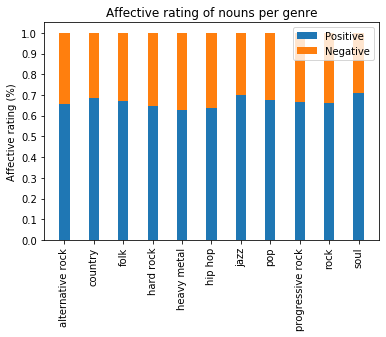

In [23]:
positives = [value[1] for value in noun_ratings.values()]
negatives = [value[3] for value in noun_ratings.values()]

N = len(positives)
ind = np.arange(N)    
width = 0.35       

p1 = plt.bar(ind, positives, width)
p2 = plt.bar(ind, negatives, width, bottom=positives)

plt.ylabel('Affective rating (%)')
plt.title('Affective rating of nouns per genre')
plt.xticks(ind, noun_ratings.keys(), rotation = 90)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend((p1[0], p2[0]), ('Positive', 'Negative'))

plt.savefig("affective_rating_nouns.pdf", bbox_inches='tight')

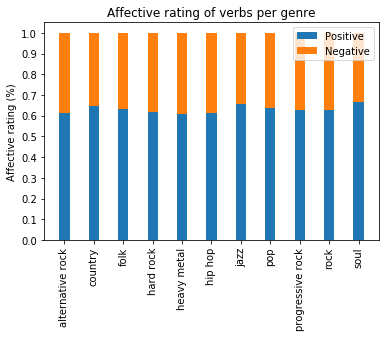

In [24]:
positives = [value[1] for value in verb_ratings.values()]
negatives = [value[3] for value in verb_ratings.values()]

N = len(positives)
ind = np.arange(N)  
width = 0.35      

p1 = plt.bar(ind, positives, width)
p2 = plt.bar(ind, negatives, width, bottom=positives)

plt.ylabel('Affective rating (%)')
plt.title('Affective rating of verbs per genre')
plt.xticks(ind, verb_ratings.keys(), rotation = 90)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend((p1[0], p2[0]), ('Positive', 'Negative'))

plt.savefig("affective_rating_verbs.pdf", bbox_inches='tight')

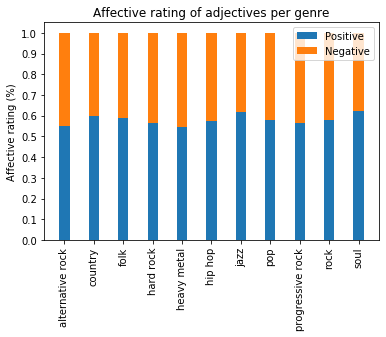

In [25]:
positives = [value[1] for value in adjective_ratings.values()]
negatives = [value[3] for value in adjective_ratings.values()]

N = len(positives)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, positives, width)
p2 = plt.bar(ind, negatives, width, bottom=positives)

plt.ylabel('Affective rating (%)')
plt.title('Affective rating of adjectives per genre')
plt.xticks(ind, adjective_ratings.keys(), rotation = 90)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.legend((p1[0], p2[0]), ('Positive', 'Negative'))

plt.savefig("affective_rating_adjectives.pdf", bbox_inches='tight')

## Type/Token Ratio

In [26]:
list_of_files = []
for file in os.listdir("/Users/appau/Desktop/Projekt/Analysis"):
    if file.endswith('csv'):
        list_of_files.append(file)
list_of_files_analysis = [file for file in list_of_files if 'analysis' in file]

In [27]:
list_of_files_analysis

['alternative rock_analysis.csv',
 'country_analysis.csv',
 'folk_analysis.csv',
 'hard rock_analysis.csv',
 'heavy metal_analysis.csv',
 'hip hop_analysis.csv',
 'jazz_analysis.csv',
 'pop_analysis.csv',
 'progressive rock_analysis.csv',
 'rock_analysis.csv',
 'soul_analysis.csv']

In [28]:
def type_token_ratio_songs():
    '''calculates the type/token ratio for each song'''
    songs_and_ttr = []
    for file in list_of_files_analysis:
        file = pd.read_csv(file)
        genre = file.genre.unique()[0]
        for song in file.song:
            tokens = 0
            types = []
            song = song
            for token in song.split(' '):
                tokens += 1
                if token.lower() not in types:
                    types.append(token.lower())
            songs_and_ttr.append((song, genre, round((len(types)/tokens)*100, 3)))
    return songs_and_ttr

In [29]:
ttr_per_song = type_token_ratio_songs()

In [30]:
ttr_per_song[6000:6010]

[('The wicked king clubs awoke queen turned His lips laughing spoke His eyes like bullets burned The suns upon gambling day His queen smiled low blissfully Lets make wretched fool play Plain agree send deuce diamond His four hart trey spade Three kings legions come Preparations soon made They voted club days commander Gave army face number All outlaw jack diamonds And aces sky give sevens first instructions Spirit game stud Stakes unscarred limitation Tween man named Gold man named Mud Club filled Gold greedy vapors Til long green eyes glow Mud left sighs trembles Watching hard earned money Flushes fell Gold like water Tens paired paired But aces flew heaven And diamond jack called man friend The diamond queen saw Muds ordeal Began think long lost son Fell knees mothers mercy Prayed angels every one The diamond queen prayed prayed And diamond angel filled Muds hole The wicked king clubs Fell face front Gold Now three kings come Clubs command But angels sky ride Three kings streets Gold

In [31]:
with open('ttr_per_song.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['song', 'genre', 'ttr'])
    for row in ttr_per_song:
        csv_out.writerow(row)

In [32]:
file = pd.read_csv('ttr_per_song.csv')

In [33]:
file

,song,genre,ttr
0,Picked girl And sailed around world Why What e...,alternative rock,46.269
1,aint got Nothing scared aint got Nothing scare...,alternative rock,40.299
2,far Ive really stayed touch Well knew much sur...,alternative rock,37.113
3,Sitting SDT Waiting underground train rumble u...,alternative rock,54.444
4,Grandma got new dentures eat crust pizza Been ...,alternative rock,83.784
5,This ballad good times put battery leg Put roc...,alternative rock,79.167
6,Battle Battle Battle Battle Battle Battle Some...,alternative rock,39.189
7,The point looked Has always part brain Now min...,alternative rock,50.820
8,Beetlebum What youve done Shes gun Now youve d...,alternative rock,34.524
9,Bow bells say goodbye last train Over river Ou...,alternative rock,90.278


In [34]:
genre_list = []
for song in ttr_per_song:
    genre = song[1]
    if genre not in genre_list:
        genre_list.append(genre)

In [35]:
genre_list

['alternative rock',
 'country',
 'folk',
 'hard rock',
 'heavy metal',
 'hip hop',
 'jazz',
 'pop',
 'progressive rock',
 'rock',
 'soul']

In [36]:
def average_ttr_per_genre():
    '''calculates the average type/token ratio per genre based on the ratio of each individual song'''
    genre_count = {}
    final_dict = {}
    for song in ttr_per_song:
        genre = song[1]
        ttr = song[2]
        if genre not in genre_count:
            genre_count[genre] = 1
        else:
            genre_count[genre] += 1
        if genre not in final_dict:
            final_dict[genre] = ttr
        else:
            final_dict[genre] += ttr
    for entry in final_dict.keys():
        check_genre = entry
        final_dict[entry] = final_dict[entry]/genre_count[check_genre]
    return final_dict
            

In [37]:
average_ttr = average_ttr_per_genre()

In [38]:
average_ttr

{'alternative rock': 56.60199309478981,
 'country': 60.77885699189845,
 'folk': 63.112870789957114,
 'hard rock': 56.70082828282829,
 'heavy metal': 62.54948389694046,
 'hip hop': 62.06076075105997,
 'jazz': 59.38259750390008,
 'pop': 53.30881558185419,
 'progressive rock': 61.86998801973235,
 'rock': 58.90514373783247,
 'soul': 53.68996858006051}

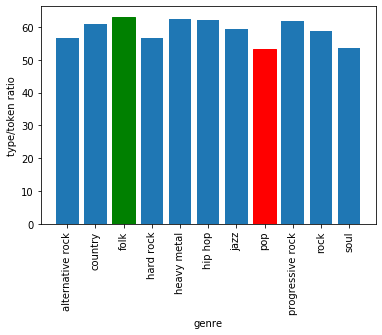

In [39]:
barlist = plt.bar(range(len(average_ttr)), list(average_ttr.values()), align='center')
barlist[2].set_color('g')
barlist[-4].set_color('r')
plt.xticks(range(len(average_ttr)), list(average_ttr.keys()), rotation = 90)
plt.xlabel('genre')
plt.ylabel('type/token ratio')
plt.savefig("average_ttr_per_genre.pdf", bbox_inches='tight')